# A breathing space: Review of basic shell tools and SQL

**BY SERHAT ÇEVİKEL**

This week, we will take a deep breath and review what we have learnt so far: basic shell tools and SQL

## Before we start

Please run the following line so that the postgresql server is ready when we get to the SQL section

Wait for a minute and rerun on error message

In [ ]:
/usr/lib/postgresql/11/bin/pg_ctl start -D /etc/postgresql/11/main/ -m smart

## Jupyter kernels

A Jupyter notebook is mainly composed of two types of cells:

- Informative "markdown" cells,
- Executable "code" cells

Each notebook is used with a kernel - a connector to the interpreter of a programming language such as Python3, R, bash etc.

A notebook running on a Python3 kernel may also work with "magics" - a feature enabling executing a code of different language such as SQL as such:

```Python
%% sql
```


### SoS kernel

SoS - stands for ""Script of Scripts" - is a special kind of Jupyter kernel in that, each cell can be run with a separate kernel installed in the working environment. In our examples we use SoS to run bash, R and SQL codes from within the same notebook.

This kind of a kernel is called as "polyglot" meaning multi language

The dropdown menu on the right determines the kind of interpreter/programming language that the code will be executed with

## Shell tools

### Environment variables

Let's declare the environment variable named "datadir" again for accessing the path of our data directory more easily:

Note that ~ is a shorthand for $HOME or the home directory or the current user:

In [ ]:
datadir=~/data

And we declare another environment variable based on $datadir: imdbdir

In [ ]:
imdbdir=$datadir/imdb

### Get help

You can get help on any command with any of the three:

whatis: Most concise
man: Most verbose
tldr: Best of both worlds. Lists any most common usages

Our cheatsheet for major commands is here:
https://docs.google.com/spreadsheets/d/1TflHe1LaIA154GJBZOUV_CveJYvJDGf5khjdzp_tgcU


### echo

Echo either:

- prints a value to the console or standard output (stdout)
- prints the contents of a variable to the console or stdout

In [ ]:
echo "Hello World"

In [ ]:
echo ~

In [ ]:
echo $datadir
echo $imdbdir

### ls

lists the file contents of a path 

In [ ]:
ls -l $imdbdir

In [ ]:
ls -l $imdbdir/tsv

### glob "*"

Generalizes actions by pattern matching:

In [ ]:
ls -l $imdbdir/tsv/*basics*

### redirect operator ">", ">>"

Redirects the output of a former command into a file

In [ ]:
echo "Hello World" >> ~/helloworld

In [ ]:
ls -l ~/helloworld

### cat

Prints the contents of a file or files

In [ ]:
cat ~/helloworld

### wc

Returns the line, word, character or byte count of standard input

In [ ]:
wc -l ~/helloworld

### pipe operator "|"

Connects the output of a former command into the input of a latter command. Can be chained

In [ ]:
cat ~/helloworld | wc -l

### wc

Returns the line, word, character or byte count of standard input

### mkdir

Creates new directories

In [ ]:
mkdir $imdbdir/deletethis

In [ ]:
ls -l $imdbdir

### rm

Remove files or directories
Use with recursive (-r) option to delete directories, even if they are empty

In [ ]:
rm -r $imdbdir/deletethis

In [ ]:
ls -l $imdbdir

### cp

Copies files and directories from a path to another path

In [ ]:
cp ~/helloworld ~/helloworld1

In [ ]:
cat ~/helloworld1

### gzip, gunzip

Zip and unzip files/directories

In [ ]:
gzip ~/helloworld

In [ ]:
ls -l ~/helloworld*

In [ ]:
gunzip ~/helloworld.gz

In [ ]:
ls -l ~/helloworld*

### zcat

Print the contents of a zipped file without the need to unzip

In [ ]:
gzip ~/helloworld
zcat ~/helloworld.gz
gunzip ~/helloworld.gz

### less, zless

Pager for viewing and searching inside large files on the terminal (can work in a terminal window)

zless does the same thing for zipped files without the need to unzip

### screen

Terminal multiplexer. Enables multiple terminal windows to work on simultaneously on remote connections without a need to make a separate connection for each window (can work in a terminal window)

### head

Print initial n lines of a file or standard input (stdin)

Can also be used in order to delete last n lines of a file or stdin

In [ ]:
zcat $imdbdir/tsv/name.basics.tsv.gz | head -10

### tail

Print last n lines of a file or standard input (stdin)

Can also be used in order to delete initial n lines of a file or stdin

In [ ]:
zcat $imdbdir/tsv/name.basics.tsv.gz | tail -10

### find

Find files and directories recursively based on many options and optionally execute a command on each result

In [ ]:
find $imdbdir

### numfmt

Pretty print number formats

In [ ]:
echo 1000000000 | numfmt --to=si

### yes

Print a term continuously until terminated

Can be used for non-interactive inputting answers to some interactive commands (like deleting directories etc)

### for loop

Repeat the same action on multiple inputs

In [ ]:
for i in $imdbdir/*;
do
    ls -l $i
done

### while loop

Repeats an action as long as a logical condition holds true 

In [ ]:
i=0

while [ $i -lt 10 ]; # means while i is less than 10
do
    echo $i;
    i=$(( $i + 1 )) # that is for an arithmetic operation for incrementing
done

### if.. else

To test a condition and make an action on the result

In [ ]:
if [[ 1 == 1 ]];
then
    echo "they are equal";
else
    echo "they are not equal";
fi

In [ ]:
if [[ 1 == 2 ]];
then
    echo "they are equal";
else
    echo "they are not equal";
fi

### xargs

Mimicks a for loop: Repeat the same action on multiple inputs, sequentially

In [ ]:
# find only directories and list content of each
find $imdbdir -type d | \
xargs -i ls -l "{}"

### parallel

Similar to xargs, put operates on multiple inputs parallelly

In [ ]:
find $imdbdir -type d | \
parallel -j0 ls -l "{}"

### column

Format input into well defined columns

In [ ]:
cat $imdbdir/tsv2/name.basics.tsv | head -10 | column -t

### seq

Create a sequence of numbers

In [ ]:
seq 5 1 15

### printf

Similar to echo but you can control the output format better

In [ ]:
# create a sequence from 5 to 15
# print each number as two digits (with leading zeros) and put a newline between each

seq 5 1 15 | xargs printf "%02d\n"

### grep

Simple pattern match

In [ ]:
seq 100 | grep 1

### sed

Stream editor. Can do many things on textual and line orinted data as substitution, line printing, append, delete, insert, etc

Most basic usage is the find a pattern and substitute with something else

In [ ]:
seq 20 | sed 's/1/a/g' # find 1's and change into "a" globally (all instances)

### tr

Translate a character to something else, squeeze repeating characters into a single instance or completely delete a character

Simpler version of sed substitute

In [ ]:
seq 10 1 15 | tr -s "1"

In [ ]:
seq 10 1 15 | tr -d "1"

In [ ]:
seq 10 1 15 | tr "1" "a"

### awk

A better grep and sed for column separated data that can work on each column

In [ ]:
# print the third column separated with tabs

zcat $imdbdir/tsv/name.basics.tsv.gz | head -10 | awk -F "\t" '{ print $3 }'

In [ ]:
# print all columns for rows third column of which is equal to 1899

zcat $imdbdir/tsv/name.basics.tsv.gz |\
    head -10 |\
    awk -F "\t" '$3 == 1899 { print $0 }'

### sort

Sort input numerically or as character

In [ ]:
# sort as character

seq 5 1 15 | sort

In [ ]:
# reverse sort numerically

seq 5 1 15 | sort -nr

### uniq

Get unique values of a sorted input (optionally with count values

In [ ]:
# in the sequence to 20, replace 2's and 3's with one and get the counts of unique values


seq 20 | tr "2" "1" | tr "3" "1" | sort -n | uniq -c

### pr

Pretty print input with some format options such as number of columns

In [ ]:
seq 100 | pr -5 -t

### gnuplot

Simple plots on the terminal

In [ ]:
# print two series 1:10 and 11:20

seq 20 | pr -2 -t

In [ ]:
# plot those two series

seq 20 |\
    pr -2 -t |\
    gnuplot -e "set terminal dumb; plot '-' using 2:1 w points pt '*'"

### ps

get info on running processes

In [ ]:
ps aux | grep jupyter

### hostname

Get info on hostname of the system

In [ ]:
hostname
hostname -I

### du

Get recursive disk usage of files and directories

In [ ]:
du -sh $imdbdir

### df

Get info on mounted file systems

In [ ]:
df -h

## SQL

Check whether SQL service is running by responding to the below command:

In [ ]:
psql -U postgres -c "\l"

### meta-commands of psql/pgcli

psql and pgcli clients offer some meta-commands that start with "\" and that offer shortcuts to some common operations

You can get help on that using "\?" - a meta-command itself

In [ ]:
psql -U postgres -c "\?"

"\l" lists databases:

In [ ]:
psql -U postgres -c "\l"

"\c" connects to database:

In [ ]:
psql -U postgres -c "\c imdb2"

"\dt" lists tables in a database:
"\dt+" gives more detail

In [ ]:
# connect to imdb2 database as postgres user and list details of all tables in the database

psql -U postgres -d imdb2 -c "\dt+"

"\d" lists fields in a table

"\d+" gives more detail:

In [ ]:
# connect to imdb2 database as postgres user and list details of columns of title_basics table in the database

psql -U postgres -d imdb2 -c "\d+ title_basics"

To get detailed information on all tables and primary keys in the public schema (like a named directory of databases, tables and keys)

In [ ]:
# connect to imdb2 database as postgres user and list details of columns of all tables and keys in the database

psql -U postgres -d imdb2 -c "\d+ public.*"

You can go back to this output frequently to view a "map" of the database: tables and columns

not that "not null" fields collectively show the primary key of a table

### tables and fields of imdb2 database

Above command is repeated here in a separate section for easy navigation.

You may need to returnback to this output while writing queries

You can view the same output from the imdb_database text file on the home directory

In [ ]:
# connect to imdb2 database as postgres user and list details of columns of all tables and keys in the database

psql -U postgres -d imdb2 -c "\d+ public.*"

### pgcli

Due to its syntax highlighting and smart completion features, it is easier to write an sql statement on pgcli

Now let's open a terminal from inside Jupyter/binder by clicking on the plus sign - the new launcher - to the left of the toolbar and click on the black terminal icon with the \$ sign:

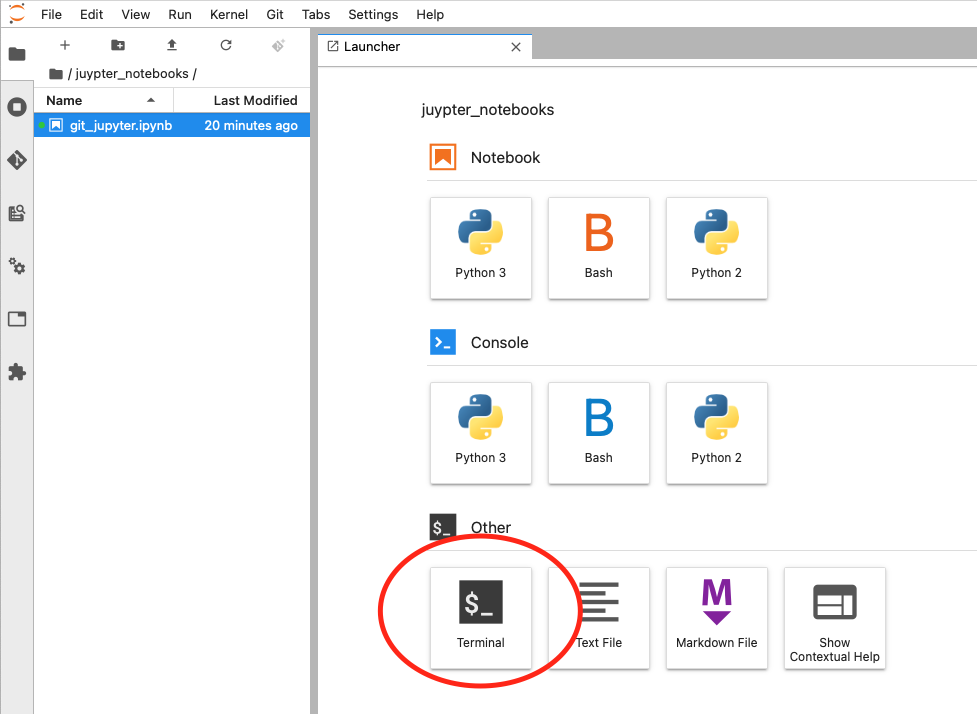

Now please copy and paste the below command inside that terminal:

```Bash
screen -S 1
```

In [ ]:
scr=$(screen -ls | grep -P "Attached" | head -1 | grep -Po "^\t+.+?(?=\s|\t)" | tr -d "\t")
screen -S $scr -X stuff "pgcli -U postgres\n"

### Sending sql queries to postgresql server through Python3 kernel

We will use the Python3 kernel with sql magic (remember, writing a code of different language from a kernel)

Note that the kernel selection on the right is Python3 now, not bash above:

In [ ]:
%load_ext sql

In [ ]:
%sql postgres://postgres@localhost:5435/imdb2

### start with a basic select query on title_ratings table

Remember the fields of title_ratings table:

```
                                  Table "public.title_ratings"
    Column     |  Type   | Collation | Nullable | Default | Storage  | Stats target | Description 
---------------+---------+-----------+----------+---------+----------+--------------+-------------
 tconst        | text    |           | not null |         | extended |              | 
 averagerating | numeric |           |          |         | main     |              | 
 numvotes      | integer |           |          |         | plain    |              | 
Indexes:
    "tconst_pk_04" PRIMARY KEY, btree (tconst)
```

Now let's return the initial 10 rows of the title_ratings table, selecting onlu averagerating and numvotes columns:

In [ ]:
%%sql

SELECT averagerating, numvotes
    FROM title_ratings
    LIMIT 10;

Now select only those titles with numvotes above 1,000,000 (all columns using glob "\*")

In [ ]:
%%sql

SELECT *
    FROM title_ratings
        WHERE numvotes > 1000000;

Now select only those titles with a rating above or equal to 9.0. Limit to first 20 rows

In [ ]:
%%sql

SELECT *
    FROM title_ratings
        WHERE averagerating > 9
        LIMIT 20;

The results are not so informative with numvotes as low as 5,6, etc

Now your first exercise. You can reuse the SQL statements from the previous week:

**EXERCISE 1:**

Select those rows from title_ratings table
- where average rating is above 8.8 and number of votes is above 500,000 (do not use equality)
- sort by decreasing order of averagerating first and then decreasing order of numvotes

Note: You can try below cells or pgcli from the terminal to test your commands

The output should be:

```
tconst   | averagerating | numvotes 
-----------+---------------+----------
 tt0944947 |           9.5 |  1238174
 tt0903747 |           9.5 |  1021165
 tt0111161 |           9.3 |  1858757
 tt0068646 |           9.2 |  1269042
 tt1475582 |           9.2 |   601611
 tt0468569 |           9.0 |  1837035
 tt0071562 |           9.0 |   874506
 tt0110912 |           8.9 |  1454537
 tt0167260 |           8.9 |  1330244
 tt0108052 |           8.9 |   954632
 tt0108778 |           8.9 |   551546
 tt0060196 |           8.9 |   551112
 tt0050083 |           8.9 |   507580
(13 rows)
```

In [ ]:
%%sql

-- statement here

In [ ]:
psql -U postgres -d imdb2 <<EOF

-- or you may write your statement here
EOF

**SOLUTION 1:**

In [ ]:
pass1=
encrypt="U2FsdGVkX1/YA0HD2mYThlWhIn52T1/wW/5hH8E67sFyMF7myX8B2qXisqoRkGX/ QWCXKNLQQbPxzibYKGTDUrJ/hDck/cKgscGK2klHKsxFKIQKpyCbwcDKr0PbvytJ zLsue1g7MAjhKsVdi4xV39SItJXnROxMQvV3HYsQIQ3TyLxNXNW4+6IUe0p8m8Hm MZJYH9pmNXBXyNIU/g769g9utwTYEqkjSvLIWlJbQdjqnZmDwQDYpgDVJGKKHELo UuLnI5yJNDAKIxkwqD4ubw=="
solution=$(echo $encrypt | openssl enc -md sha256 -aes-128-cbc -a -d -salt -pass pass:$pass1 2> /dev/null)
echo "$solution"; echo
for l in "$solution"; do eval "${l}"; done

This is OK, but we don't have meaningful information unless we combine the results with other tables in the database

### Joins

ttXXXXXXX values do not mean anything.

We know that details of movies reside in title_basics table.

Let's recite the fields of title_basics and title_ratings table:

```
                                  Table "public.title_ratings"
    Column     |  Type   | Collation | Nullable | Default | Storage  | Stats target | Description 
---------------+---------+-----------+----------+---------+----------+--------------+-------------
 tconst        | text    |           | not null |         | extended |              | 
 averagerating | numeric |           |          |         | main     |              | 
 numvotes      | integer |           |          |         | plain    |              | 
Indexes:
    "tconst_pk_04" PRIMARY KEY, btree (tconst)

                                    Table "public.title_basics"
     Column     |  Type   | Collation | Nullable | Default | Storage  | Stats target | Description 
----------------+---------+-----------+----------+---------+----------+--------------+-------------
 tconst         | text    |           | not null |         | extended |              | 
 titletype      | text    |           |          |         | extended |              | 
 primarytitle   | text    |           |          |         | extended |              | 
 originaltitle  | text    |           |          |         | extended |              | 
 isadult        | boolean |           |          |         | plain    |              | 
 startyear      | integer |           |          |         | plain    |              | 
 endyear        | integer |           |          |         | plain    |              | 
 runtimeminutes | integer |           |          |         | plain    |              | 
 genres         | text    |           |          |         | extended |              | 
Indexes:
    "tconst_pk" PRIMARY KEY, btree (tconst)
```

We see that tconst is the common field between two tables, we can join on that.

Now let's return the titletype, primarytitle, startyear and genres information from title_basics along with all fields from title_ratings for rows filtered in the previous query

We will use aliases tr and tb for the tables

In [ ]:
%%sql

SELECT tr.*, tb.titletype, tb.primarytitle, tb.startyear, tb.genres
FROM title_ratings tr
    LEFT JOIN title_basics tb ON tr.tconst = tb.tconst
WHERE tr.averagerating > 8.8
    AND tr.numvotes > 500000
ORDER BY tr.averagerating DESC, tr.numvotes DESC;

Now, let's say we are not concerned with tvSeries and exclude them for our search.

Note that when the column names are the same for both sides, we can use the shorthand "USING" 

In [ ]:
%%sql

SELECT tr.*, tb.titletype, tb.primarytitle, tb.startyear, tb.genres
    FROM title_ratings tr
        LEFT JOIN title_basics tb USING (tconst)
        WHERE tr.averagerating > 8.8
        AND tr.numvotes > 500000
        AND NOT tb.titletype = 'tvSeries'
        ORDER BY tr.averagerating DESC, tr.numvotes DESC;

Now your second task:

**EXERCISE 2:**

- Filter for those rows from title_basics and THEN title_ratings where genres include Horror, runtimeminutes is below 10 minutes and startyear is 2017 and averagerating is above 8
- So you should join title_basics to title_ratings from LEFT (inverse of the previous example where we joined title_ratings into title_basics from left)
- Return only titletype and primarytitle from title_basics and averagerating from title_ratings
- Order by increasing averagerating

Output should be:

```
averagerating | titletype |               primarytitle                
---------------+-----------+-------------------------------------------
           8.1 | tvSeries  | Gojira awakening
           8.2 | short     | The Hunt
           8.2 | video     | Leningrad: Kolshik
           8.3 | short     | One Silent Man
           8.5 | short     | Room for One More
           8.5 | short     | Wyrmwood: Chronicles of the Dead - Teaser
           8.6 | short     | Guardians
           8.6 | short     | House That Took My Soul
           8.8 | short     | Body Image
           8.9 | short     | A La Dolce Vita
           9.0 | short     | Feeling
           9.2 | short     | Get Away
           9.2 | short     | Fresh Blood
           9.2 | short     | The Rage
           9.7 | short     | Tarot
           9.9 | short     | Don't Open the Door!
          10.0 | short     | Office Terror
          10.0 | short     | Elise's Nightmare
          10.0 | short     | Darkness
(19 rows)
```

In [ ]:
%%sql

-- statement here

In [ ]:
psql -U postgres -d imdb2 <<EOF

-- or you may write your statement here
EOF

**SOLUTION 2:**

In [ ]:
pass1=
encrypt="U2FsdGVkX1/bPN4TpfNlsgZLV8tepo3zJyjWbfb1UF5sK20crLOMSF9eUi7jwJU5 n9VBD6LdXDzvtAU9szS+nlWmizEeG+EPmhd9wTvxIftO9TDuZ2pYKMpDUp/dvReq bpb0E3Xcmeqxz++rCxNcVvvSrtP21h4Ia/AHOf0xFRPbgdeJjoVpkt9MEh8rOS8M akYdMQEN6n/bSQbmjywfzYGGfcE8222Vj89S3F4LYgO3sWD5ramKYRLfoXS3ER4E lBXQcwzMJYdbrKoc0gdBdSjsW0yVKsEdwKLw4xarV33o67nhW7KEpJDc9SxYEvmd muVZ0C4x8eWUt+SFixROEkASkkSE8YPYx3650K02imr5mOlWWoCykec+Si1FJF7J +QsOlQlz+idmpkq5hXo0v4KAUCKMqr6cqycxw8w7Ucg="
solution=$(echo $encrypt | openssl enc -md sha256 -aes-128-cbc -a -d -salt -pass pass:$pass1 2> /dev/null)
echo "$solution"; echo
for l in "$solution"; do eval "${l}"; done

Of course most of them are short movies

Now let's join a third table to get the principalcast of those movies by adding title_principals_melt table

Let's return only primarytitle and principalcast fields and order by primarytitle:

In [ ]:
%%sql

SELECT tb.primarytitle, tp.principalcast
FROM title_basics tb
    LEFT JOIN title_ratings tr USING (tconst)
    LEFT JOIN title_principals_melt tp USING (tconst)
WHERE tr.averagerating > 8.8
    AND tr.numvotes > 500000
    AND NOT tb.titletype = 'tvSeries'
ORDER BY tb.primarytitle;

Fairly good. But those nmXXXXXXX values do not mean nothing.

Let's join these tables into name_basics to get the names of the cast

Remember the structure of name_basics:

```
      Column       |  Type   | Collation | Nullable | Default | Storage  | Stats target | Description 
-------------------+---------+-----------+----------+---------+----------+--------------+-------------
 nconst            | text    |           | not null |         | extended |              | 
 primaryname       | text    |           |          |         | extended |              | 
 birthyear         | integer |           |          |         | plain    |              | 
 deathyear         | integer |           |          |         | plain    |              | 
 primaryprofession | text    |           |          |         | extended |              | 
 knownfortitles    | text    |           |          |         | extended |              | 
 ```

**EXERCISE 3:**

Join name_basics table to the previous query.

Note that the field names for matching nmXXXXXXX values are not the same between title_principals_melt and name_basics tables. So use "ON" clause as before:

Report primarytitle and startyear from tb, primaryname and birthyear from name_basics and averagerating from title_ratings.

Order by primary name first and primarytitle later

Output should be:

```
                primarytitle                  | startyear |      primaryname      | birthyear | averagerating 
-----------------------------------------------+-----------+-----------------------+-----------+---------------
 The Dark Knight                               |      2008 | Aaron Eckhart         |      1968 |           9.0
 The Good, the Bad and the Ugly                |      1966 | Agenore Incrocci      |      1919 |           8.9
 The Good, the Bad and the Ugly                |      1966 | Alberto Grimaldi      |      1925 |           8.9
 The Godfather                                 |      1972 | Albert S. Ruddy       |      1930 |           9.2
 The Good, the Bad and the Ugly                |      1966 | Aldo Giuffrè          |      1924 |           8.9
 The Godfather                                 |      1972 | Al Pacino             |      1940 |           9.2
 The Godfather: Part II                        |      1974 | Al Pacino             |      1940 |           9.0
 Pulp Fiction                                  |      1994 | Andrzej Sekula        |      1954 |           8.9
 The Lord of the Rings: The Return of the King |      2003 | Barrie M. Osborne     |      1944 |           8.9
 The Godfather: Part II                        |      1974 | Barry Malkin          |      1938 |           9.0
 Schindler's List                              |      1993 | Ben Kingsley          |      1943 |           8.9
 The Shawshank Redemption                      |      1994 | Bob Gunton            |      1945 |           9.3
 The Dark Knight                               |      2008 | Bob Kane              |      1915 |           9.0
 12 Angry Men                                  |      1957 | Boris Kaufman         |      1897 |           8.9
 Schindler's List                              |      1993 | Branko Lustig         |      1932 |           8.9
 Pulp Fiction                                  |      1994 | Bruce Willis          |      1955 |           8.9
 12 Angry Men                                  |      1957 | Carl Lerner           |      1912 |           8.9
 Schindler's List                              |      1993 | Caroline Goodall      |      1959 |           8.9
 The Dark Knight                               |      2008 | Charles Roven         |      1949 |           9.0
 The Dark Knight                               |      2008 | Christian Bale        |      1974 |           9.0
 The Dark Knight                               |      2008 | Christopher Nolan     |      1970 |           9.0
 The Good, the Bad and the Ugly                |      1966 | Clint Eastwood        |      1930 |           8.9
 The Dark Knight                               |      2008 | David S. Goyer        |      1965 |           9.0
 Pulp Fiction                                  |      1994 | David Wasco           |           |           8.9
 The Godfather                                 |      1972 | Diane Keaton          |      1946 |           9.2
 The Godfather: Part II                        |      1974 | Diane Keaton          |      1946 |           9.0
 The Lord of the Rings: The Return of the King |      2003 | Elijah Wood           |      1981 |           8.9
 The Good, the Bad and the Ugly                |      1966 | Eli Wallach           |      1915 |           8.9
 The Godfather                                 |      1972 | Francis Ford Coppola  |      1939 |           9.2
 The Godfather: Part II                        |      1974 | Francis Ford Coppola  |      1939 |           9.0
 The Shawshank Redemption                      |      1994 | Frank Darabont        |      1959 |           9.3
 The Lord of the Rings: The Return of the King |      2003 | Fran Walsh            |      1959 |           8.9
 The Good, the Bad and the Ugly                |      1966 | Furio Scarpelli       |      1919 |           8.9
 Schindler's List                              |      1993 | Gerald R. Molen       |      1935 |           8.9
 The Godfather                                 |      1972 | Gordon Willis         |      1931 |           9.2
 The Godfather: Part II                        |      1974 | Gordon Willis         |      1931 |           9.0
 The Dark Knight                               |      2008 | Heath Ledger          |      1979 |           9.0
 12 Angry Men                                  |      1957 | Henry Fonda           |      1905 |           8.9
 The Lord of the Rings: The Return of the King |      2003 | Howard Shore          |      1946 |           8.9
 The Lord of the Rings: The Return of the King |      2003 | Ian McKellen          |      1939 |           8.9
 The Godfather                                 |      1972 | James Caan            |      1940 |           9.2
 12 Angry Men                                  |      1957 | John Fiedler          |      1925 |           8.9
 Pulp Fiction                                  |      1994 | John Travolta         |      1954 |           8.9
 Schindler's List                              |      1993 | John Williams         |      1932 |           8.9
 The Dark Knight                               |      2008 | Jonathan Nolan        |      1976 |           9.0
 The Lord of the Rings: The Return of the King |      2003 | J.R.R. Tolkien        |      1892 |           8.9
 12 Angry Men                                  |      1957 | Kenyon Hopkins        |      1912 |           8.9
 Pulp Fiction                                  |      1994 | Lawrence Bender       |      1957 |           8.9
 12 Angry Men                                  |      1957 | Lee J. Cobb           |      1911 |           8.9
 The Good, the Bad and the Ugly                |      1966 | Lee Van Cleef         |      1925 |           8.9
 Schindler's List                              |      1993 | Liam Neeson           |      1952 |           8.9
 The Dark Knight                               |      2008 | Lorne Orleans         |           |           9.0
 The Good, the Bad and the Ugly                |      1966 | Luciano Vincenzoni    |      1926 |           8.9
 The Godfather                                 |      1972 | Mario Puzo            |      1920 |           9.2
 The Godfather: Part II                        |      1974 | Mario Puzo            |      1920 |           9.0
 The Godfather                                 |      1972 | Marlon Brando         |      1924 |           9.2
 12 Angry Men                                  |      1957 | Martin Balsam         |      1919 |           8.9
 The Dark Knight                               |      2008 | Michael Caine         |      1933 |           9.0
 The Good, the Bad and the Ugly                |      1966 | Mickey Knox           |      1921 |           8.9
 The Shawshank Redemption                      |      1994 | Morgan Freeman        |      1937 |           9.3
 The Shawshank Redemption                      |      1994 | Niki Marvin           |           |           9.3
 The Godfather                                 |      1972 | Nino Rota             |      1911 |           9.2
 The Godfather: Part II                        |      1974 | Nino Rota             |      1911 |           9.0
 The Lord of the Rings: The Return of the King |      2003 | Orlando Bloom         |      1977 |           8.9
 The Lord of the Rings: The Return of the King |      2003 | Peter Jackson         |      1961 |           8.9
 The Lord of the Rings: The Return of the King |      2003 | Philippa Boyens       |           |           8.9
 Pulp Fiction                                  |      1994 | Quentin Tarantino     |      1963 |           8.9
 Schindler's List                              |      1993 | Ralph Fiennes         |      1962 |           8.9
 12 Angry Men                                  |      1957 | Reginald Rose         |      1920 |           8.9
 The Shawshank Redemption                      |      1994 | Richard Francis-Bruce |      1948 |           9.3
 The Godfather: Part II                        |      1974 | Richard Marks         |      1943 |           9.0
 The Godfather: Part II                        |      1974 | Robert De Niro        |      1943 |           9.0
 The Godfather: Part II                        |      1974 | Robert Duvall         |      1931 |           9.0
 Pulp Fiction                                  |      1994 | Roger Avary           |      1965 |           8.9
 The Shawshank Redemption                      |      1994 | Roger Deakins         |      1949 |           9.3
 Pulp Fiction                                  |      1994 | Sally Menke           |      1953 |           8.9
 Pulp Fiction                                  |      1994 | Samuel L. Jackson     |      1948 |           8.9
 The Good, the Bad and the Ugly                |      1966 | Sergio Leone          |      1929 |           8.9
 12 Angry Men                                  |      1957 | Sidney Lumet          |      1924 |           8.9
 The Shawshank Redemption                      |      1994 | Stephen King          |      1947 |           9.3
 Schindler's List                              |      1993 | Steven Spielberg      |      1946 |           8.9
 Schindler's List                              |      1993 | Steven Zaillian       |      1953 |           8.9
 Schindler's List                              |      1993 | Thomas Keneally       |      1935 |           8.9
 The Shawshank Redemption                      |      1994 | Thomas Newman         |      1955 |           9.3
 The Shawshank Redemption                      |      1994 | Tim Robbins           |      1958 |           9.3
 Pulp Fiction                                  |      1994 | Uma Thurman           |      1970 |           8.9
 The Lord of the Rings: The Return of the King |      2003 | Viggo Mortensen       |      1958 |           8.9
 The Godfather                                 |      1972 | William Reynolds      |      1910 |           9.2
 The Shawshank Redemption                      |      1994 | William Sadler        |      1950 |           9.3
(89 rows)
```

In [ ]:
%%sql

-- statement here

In [ ]:
psql -U postgres -d imdb2 <<EOF

-- or you may write your statement here
EOF

**SOLUTION 3:**

In [ ]:
pass1=
encrypt="U2FsdGVkX1+anp9oum+TiY1hh7QvjamDH8ouWXCYLnUviMSkZz166ig9HGPZTzD2 fzQZbv9x90xm/LjN48uPiqOjSNHbPh9sOh0By+1SgG13TLIoN550ccWxknl5lX2V MZmtXisnc7LQjXyBPNo946inzLv07DhjMTojc/cy1m9XrJeeLjAYMeSEcVCGBgT/ LZvhNOAWs87w8nLsZg9fA74lHuBimwT7oLaATS/PUU1/HkHJ/Nn7voJrlIikk8X5 QdmDHKYRwJ2H+lciBB9nKQfanYOTZk+qImzHPhkJvl8YQPOJdeD5YQ3STn9zAOkH jdVS3faWbpuv2GZpSyn85LA9feEo1bmqQmDKnuC8imhN9b4/9HfgHxmZepb80OvF yvib0H7d0DiubqXGgUzuN6cxF2OCol24t5fN+ROSHxPDsWIFh6Zfgbrza1QEjiKG o5JNrCvfBDPYlfiE8bLWQgPZdBZ2uFMmUZLd+PjbBuo7zA9EFSAYeTy5C4RYFVhy MKXwYdETW/LXleFvhiI9UCkV2eLsOYEhU7OihGKSOOv78q+96YAN9HEV8qxzgovq QfXtS7zeTPbD3GF9FuW0WgGcet2gGKd+sRr0YgIcB9Q="
solution=$(echo $encrypt | openssl enc -md sha256 -aes-128-cbc -a -d -salt -pass pass:$pass1 2> /dev/null)
echo "$solution"; echo
for l in "$solution"; do eval "${l}"; done

### DISCTINCT

In the previous query, we had 89 rows returned. But there are some cases where a cast appeared in more than one movies.

I might be interested in unique values

Let's get the values of primaryname from the previous query (with duplicate returns):

In [ ]:
%%sql

SELECT nb.primaryname
FROM title_basics tb
    LEFT JOIN title_ratings tr USING (tconst)
    LEFT JOIN title_principals_melt tp USING (tconst)
    LEFT JOIN name_basics nb ON nb.nconst=tp.principalcast
WHERE tr.averagerating > 8.8
    AND tr.numvotes > 500000
    AND NOT tb.titletype = 'tvSeries'
ORDER BY nb.primaryname;

In [ ]:
%%sql

SELECT DISTINCT nb.primaryname
FROM title_basics tb
    LEFT JOIN title_ratings tr USING (tconst)
    LEFT JOIN title_principals_melt tp USING (tconst)
    LEFT JOIN name_basics nb ON nb.nconst=tp.principalcast
WHERE tr.averagerating > 8.8
    AND tr.numvotes > 500000
    AND NOT tb.titletype = 'tvSeries'
ORDER BY nb.primaryname;

We have 83 rows returned

### GROUP BY

Now I want to summarize the returned rows from the exercise 3 a little bit.

I want to get the counts of each primarycast in the results along with their names:

In [ ]:
%%sql

SELECT nb.primaryname, count(nb.primaryname)
FROM title_basics tb
    LEFT JOIN title_ratings tr USING (tconst)
    LEFT JOIN title_principals_melt tp USING (tconst)
    LEFT JOIN name_basics nb ON nb.nconst=tp.principalcast
WHERE tr.averagerating > 8.8
    AND tr.numvotes > 500000
    AND NOT tb.titletype = 'tvSeries'
GROUP BY nb.primaryname;

See that some of the cast from the initial two installments of the Godfather Trilogy appeared in both films

**EXERCISE 4:**

Report the primarytitles and the count of primary cast from each titles (number of rows a primarytitle appears in the results)

Output should be as such:

```
                 primarytitle                  | count 
-----------------------------------------------+-------
 12 Angry Men                                  |     9
 Pulp Fiction                                  |    10
 Schindler's List                              |    10
 The Dark Knight                               |    10
 The Godfather                                 |    10
 The Godfather: Part II                        |    10
 The Good, the Bad and the Ugly                |    10
 The Lord of the Rings: The Return of the King |    10
 The Shawshank Redemption                      |    10
(9 rows)
```

In [ ]:
%%sql

-- statement here

In [ ]:
psql -U postgres -d imdb2 <<EOF

-- or you may write your statement here
EOF

**SOLUTION 4:**

In [ ]:
pass1=
encrypt="U2FsdGVkX18r50YikkE1FWIdgm6W22Xx45ud19Wl1M3pT/buGGwSPTVaIAhPU3n1 GHSuFetV+4XXMCKqbNbuXrOb7XfHMMNLnYHMGGxQNiacOAiDomrWfy/RWKVJM9Fk ezklzlIlINjQZYTJysyfdVMg7jDVYM6+c7zOyhUGQ4IywenuBYJtEj7XIKPCT7i6 3ayIEyG4zK5ePQeqQK0bp09cRpSOdgXAm6DKLiVMj89V3pV4pZ6Dd0kbAvwgjtgT Ozuvx7yxjnpzT2fE/Cz2YHT+m8QDs1DoHJ1NlQNQUvGCd+RPdEioSXeCxI/wbQpg sHOyFp3AKPRMZZxrUCxY+Ib2hzls/MXN4vjpLwBjmViamVbG0l4yhEjhH3Xy5ecN RMXNnXWWEMWVJZDrQjP6YASj2De7O/yldGaTydsPhA4+nEsIXw4W6yb4QwaDkowG KWq2ZW16z+gso2xN+Fd0m3lijhidrfwe4qah3kTiyTxI/PnNcSFywgmhZucPyNHA PhOmCb7HTTi0s/tHBS0BDnitEdxrRYRargh37lPL8rA="
solution=$(echo $encrypt | openssl enc -md sha256 -aes-128-cbc -a -d -salt -pass pass:$pass1 2> /dev/null)
echo "$solution"; echo
for l in "$solution"; do eval "${l}"; done

### HAVING

When we use conditionals after where statement, the ROWS are filtered before they are grouped

What if we want to filter the GROUPED ROWS?

We will use the having statement:

Let's filter for those movies, for which no principal cast is born before 1930

In [ ]:
%%sql

SELECT tb.primarytitle, min(nb.birthyear)
FROM title_basics tb
    LEFT JOIN title_ratings tr USING (tconst)
    LEFT JOIN title_principals_melt tp USING (tconst)
    LEFT JOIN name_basics nb ON nb.nconst=tp.principalcast
WHERE tr.averagerating > 8.8
    AND tr.numvotes > 500000
    AND NOT tb.titletype = 'tvSeries'
GROUP BY tb.primarytitle
HAVING min(nb.birthyear) > 1930;

Whom do you think ist the oldest cast in Shawshank Redemption?

We will get back to this!

**EXERCISE 5:**

Using the first query in "GROUP BY" section (that returns the count of appearances of each cast in selected movies) and a HAVING clause, filter for those cast who appear more than once

Output should be:

```
     primaryname      | count 
----------------------+-------
 Al Pacino            |     2
 Diane Keaton         |     2
 Francis Ford Coppola |     2
 Gordon Willis        |     2
 Mario Puzo           |     2
 Nino Rota            |     2
(6 rows)
```

In [ ]:
%%sql

-- statement here

In [ ]:
psql -U postgres -d imdb2 <<EOF

-- or you may write your statement here
EOF

**SOLUTION 5:**

In [ ]:
pass1=
encrypt="U2FsdGVkX18Ij8icrmvf18/DzrTN0VK1YdjUpeVyrniloOVqqFfVdNiRgdq+eOUl 2y8rxF/WPH/dTfKQD3gtS33kN6luxqUHt+/Pjsdc1S+ohzv401dKugbikE8Mn0LW hQlog6drbmM8oSCZvoVINnfH1wXwHnOWKOoo2N7G+FwsGs/GinGcVcVro97kpgOO 5Gu2CdYxSZsdm2Eul7o6CzRJaOwYVPY9Cjb+OY7DStaTaugdQXx7TEeQZa6JFkdu jY/Hlc0Tr6wUWY7jGH+wOba4vOhjXBAH3QeAzBinD1w/qqWBjjI+jLhxtUbwsNNU NC0e/sSDO45m+Me6aPxoXmlpoJcKaqYODwPbTPEChStjF2Pr1mtXgVE4bDQGS3zs kUsAHbCd/YVa6uWI8Qcc9kMrkEPJwHfFixTX5cTVGxMbK4C2ghLzQqvocF/fq7yb LnF8iaQiUmVp4ZB14vKtu6/U6KqR8y0JSpQYIDGFp2+KahO8U72R2J9ZxYwEC9j7 X5GSazID5TloYkHAWqtHuKYlrhbEoVc8t7gZNH0vt3hsd3oKwMkCBqJ/NeTDqhfq 7f0j8KORA+PXZluj1JDORg=="
solution=$(echo $encrypt | openssl enc -md sha256 -aes-128-cbc -a -d -salt -pass pass:$pass1 2> /dev/null)
echo "$solution"; echo
for l in "$solution"; do eval "${l}"; done


### Subqueries

Now, we may want to see the oldest cast in each of those selected movies.

Note that cast does not only include actors/actresses but also writers, directors, directors of photography and even composers

This cannot be implemented in a simple query combining only existing tables easily:

- We may have a separete query that includes the minimum birthyear for each movie (as we did above) and name the output of this query so that we can use it as if it is a separate table (such as mb for "minimum birthyear")

- The output will have primarytitle, minbirthyear and tconst

- And we can join this new table to title_basics, title_principals_melt and name_basics as we did before to filter for rows where birthyear of a cast is equal to the minbirthyear

In [ ]:
%%sql

SELECT mb.primarytitle, nb.birthyear, mb.minbirthyear, nb.primaryname
    FROM

(
-- this is a subquery to get the minimum birthyear for each title
SELECT tb.primarytitle, min(nb.birthyear) as minbirthyear, tb.tconst 
FROM title_basics tb
    LEFT JOIN title_ratings tr USING (tconst)
    LEFT JOIN title_principals_melt tp USING (tconst)
    LEFT JOIN name_basics nb ON nb.nconst=tp.principalcast
WHERE tr.averagerating > 8.8
    AND tr.numvotes > 500000
    AND NOT tb.titletype = 'tvSeries'
GROUP BY tb.primarytitle, tb.tconst
) mb

-- we refer to the output of this query as if it is a separate table called "mb"
-- and use the same joins above 
    LEFT JOIN title_basics tb USING (tconst)
    LEFT JOIN title_principals_melt tp USING (tconst)
    LEFT JOIN name_basics nb ON nb.nconst=tp.principalcast

-- and filter for the equality of the birthyear of each cast to the minbirthyear of the title
WHERE nb.birthyear = mb.minbirthyear

So we are sure now whom the oldest cast in The Shawshank Redemption is:

The Turkish dubbed version of this famous scene is cited here to pay a tribute to great Turkish voice over actor Nur Subaşı who deceased recently:

https://www.youtube.com/watch?v=vJ2NJPYOfjg

And again I want to pay tribute to another great Turkish voice over actor Payidar Tüfekçioğlu who also dubbed the lines of the same great actor and deceased recently:

https://www.youtube.com/watch?v=g0gAAHDko8w

Now while you are watching these performance, your last exercise comes along:

**EXERCISE 6:**

Start from the previous query:

- Now instead of minbirthyear, calculate the maxbirtyear

- Report primarytitle, primaryname, birthyear of cast, startyear of movie and age of the youngest cast at the time of the movie (just the difference of previous two columns aliased as "age"

The output should be:

```
                 primarytitle                  | birthyear | startyear | age |  primaryname   
-----------------------------------------------+-----------+-----------+-----+----------------
 12 Angry Men                                  |      1925 |      1957 |  32 | John Fiedler
 The Good, the Bad and the Ugly                |      1930 |      1966 |  36 | Clint Eastwood
 The Godfather                                 |      1946 |      1972 |  26 | Diane Keaton
 The Godfather: Part II                        |      1946 |      1974 |  28 | Diane Keaton
 Schindler's List                              |      1962 |      1993 |  31 | Ralph Fiennes
 Pulp Fiction                                  |      1970 |      1994 |  24 | Uma Thurman
 The Shawshank Redemption                      |      1959 |      1994 |  35 | Frank Darabont
 The Lord of the Rings: The Return of the King |      1981 |      2003 |  22 | Elijah Wood
 The Dark Knight                               |      1979 |      2008 |  29 | Heath Ledger
(9 rows)
```

In [ ]:
%%sql

-- statement here

In [ ]:
psql -U postgres -d imdb2 <<EOF

-- or you may write your statement here
EOF

**SOLUTION 6:**

In [ ]:
pass1=
encrypt="U2FsdGVkX1+inWe/FOTiI+3jclqSG8VttpRvAXFskVLo60z7w/pxEbJhVP0DhT0w WZBOJI1QMdfAAyZ+3VSGphmPNceXlSh6q23oBFjB+XTQWIh480rOia5+NS33SaP2 oECHQsCEQE6oLnCkdgQEoTZXsVw9BFIZ/wpR6IOJdJN1D0v1iuqQZATykmqFFst8 bJ/ipRyPDX72blRoauiYRdEj+spvgP8JX72MnuJYs5lX6xM/VQnuL4rOGtpymVl2 oZYuYHBWvFAv58njrkMR/OtyObQLcBG30nwSMWs0glYaeWolk0ewckzQ2mSJDVTt tiYvC4VewWd6tREbypCxn766DH4oWzQL3ey0YO49PA/1vjQA/a0zprC+PEsKrUdH woNCymrZJ3meNP0XnHCJ/NPHqk7WDDUKofcALVmnUaOEu1PjmZnn3MI6ijWaHYQ8 jeoyQykH9MAxv/L2sRppSsg0fmddcZPN6CdY9LdOO1r7qib4CBlsfjnLb4Jt+Ul8 ZgosolxYaq+1KyI53xl5NPdplp5yEIaInmk222u4Uj/F+UOW7RVqJWq4yFgiHgPV yMx+QeZS+gksoFvGWvGv694E8TlNBJphNFqawRlyxfcy8k4S0DFQmgzGGML6nxLf 8b4V7yCh3VnCV/68nW3nvILc1y6SrqEYyfBvFfJq6ym6QM6UFd5hsMucQuZU0Sk0 xjDi3ie20LQcNKYbIMi/C5DxkE4F9sryVNC9PTBX28ZP4pzWiPFc9/Tbk3PSLtjA gbCrTDjCekSSHdB1RYEBqAka8Kaomtiowgk9tvvNfXImsgLLULgs1C3q72bsKtyb SGEmlkZHw3x7gFa1XV+meuq7/hUrnxF5hgzlM0v6ecd9NdQIlw7m7dhGXOd8/HEJ ve2DDjTbW4r8nKhVynl9nqkehdcMgIDu/N6iVzZaEFs5oS9TZsfH84Df69htssWk /qiBhyATBvQDl0IWSAOo06YZWSNLA2X0MWLfawUdprw="
solution=$(echo $encrypt | openssl enc -md sha256 -aes-128-cbc -a -d -salt -pass pass:$pass1 2> /dev/null)
echo "$solution"; echo
for l in "$solution"; do eval "${l}"; done

